In [1]:
from tensorflow import keras
model = keras.models.load_model('drive/MyDrive/00AI/asl_model')

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
def show_image(image_path):
	image = mpimg.imread(image_path)
	plt.imshow(image)

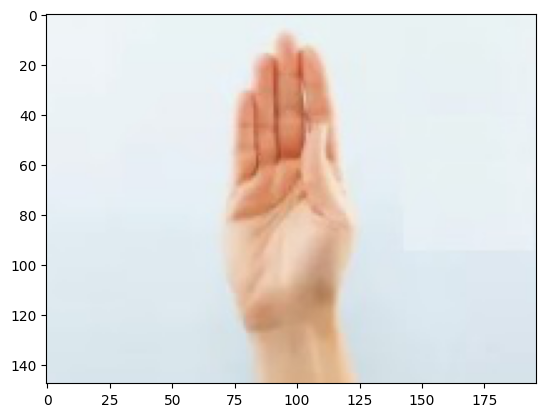

In [40]:
show_image('drive/MyDrive/00AI/b.jpg')

In [41]:
#from tensorflow.keras.preprocessing import image as image_utils
import tensorflow as tf
image_utils=tf.keras.preprocessing.image
def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

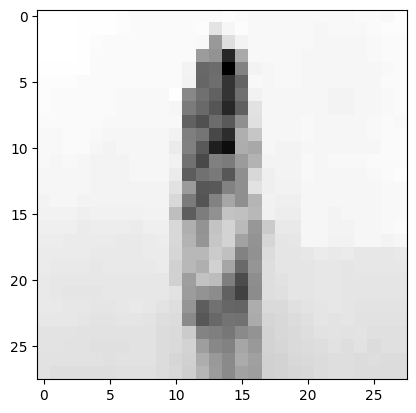

In [50]:
image = load_and_scale_image('drive/MyDrive/00AI/b.jpg')
plt.imshow(image, cmap='gray')

In [51]:
image = image_utils.img_to_array(image)

In [52]:
# This reshape corresponds to 1 image of 28x28 pixels with one color channel
image = image.reshape(1,28,28,1)

In [53]:
image = image / 255

In [54]:
prediction = model.predict(image)
print(prediction)

1/1 [==============================] - 0s 20ms/step
[[4.00528097e-06 9.07846510e-01 3.23520976e-06 2.71815848e-10
  1.42733334e-04 3.95128609e-06 3.03623859e-09 2.55434305e-08
  3.03860834e-05 1.47981527e-05 2.45745326e-08 5.07823472e-07
  4.89951963e-05 4.33980449e-06 4.74357591e-07 9.74355089e-07
  8.36831532e-07 1.01195505e-08 7.47427986e-09 6.01004501e-07
  9.18885693e-02 3.31811995e-10 7.63870776e-06 1.27038663e-06
  5.10694527e-08]]


In [55]:
import numpy as np
np.argmax(prediction)

1

In [56]:
alphabet = "abcdefghiklmnopqrstuvwxy"
dictionary = {}
for i in range(24):
	dictionary[i] = alphabet[i]
dictionary

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'p',
 15: 'q',
 16: 'r',
 17: 's',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'w',
 22: 'x',
 23: 'y'}

In [57]:
dictionary[np.argmax(prediction)]

'b'

In [28]:
def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1)
    image = image/255
    prediction = model.predict(image)
    # convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    return predicted_letter

1/1 [==============================] - 0s 20ms/step


'b'

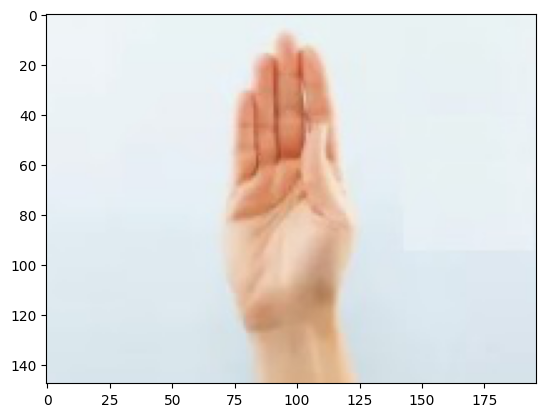

In [39]:
predict_letter('drive/MyDrive/00AI/b.jpg')

1/1 [==============================] - 0s 21ms/step


'a'

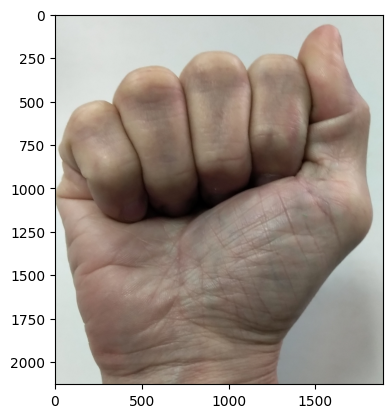

In [17]:
predict_letter('drive/MyDrive/00AI/a.png')

1/1 [==============================] - 0s 26ms/step


'b'

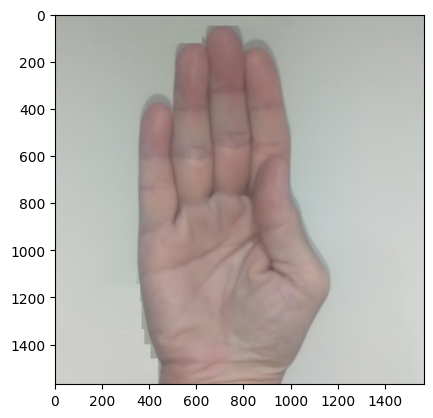

In [59]:
predict_letter('drive/MyDrive/00AI/b2.jpg')